In [4]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
%matplotlib inline

def draw_circles(circles, xlim=[-1,1], ylim=[-1,1], alpha=True, cmap='gray', adjust_border=None, figsize=(14, 14)):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    if isinstance(cmap, str):
        cmap = mpl.cm.get_cmap(cmap)

    for x, y, r, a, c in circles:
        # clipping potential overflows
        a = max(0.0, min(a, 1.0))
        c = max(0.0, min(c, 1.0))
        
        # plotting circle
        e = ptc.Circle(xy=(x,y), radius=r)
        e.set_facecolor(cmap(c))
        e.set_alpha(a)
        ax.add_artist(e)

    # adaptive border alignment
    if not adjust_border is None:    
        min_x = (circles[:,0] - circles[:,2]).min()
        max_x = (circles[:,0] + circles[:,2]).max()
        min_y = (circles[:,1] - circles[:,2]).min()
        max_y = (circles[:,1] + circles[:,2]).max()
        
        diff_x = max_x - min_x
        diff_y = max_y - min_y
        increment = (diff_x - diff_y) / 2
        increment_x = (1 + adjust_border) * max(0.0, -1 * increment) + adjust_border * diff_x
        increment_y = (1 + adjust_border) * max(0.0,      increment) + adjust_border * diff_y

        xlim = (min_x - increment_x, max_x + increment_x)
        ylim = (min_y - increment_y, max_y + increment_y)
    
    # set limits
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # cleaning the plot and preparing for easy image saving
    ax.axis('off')
    fig.tight_layout()
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)

    return fig

# Using the drawing function

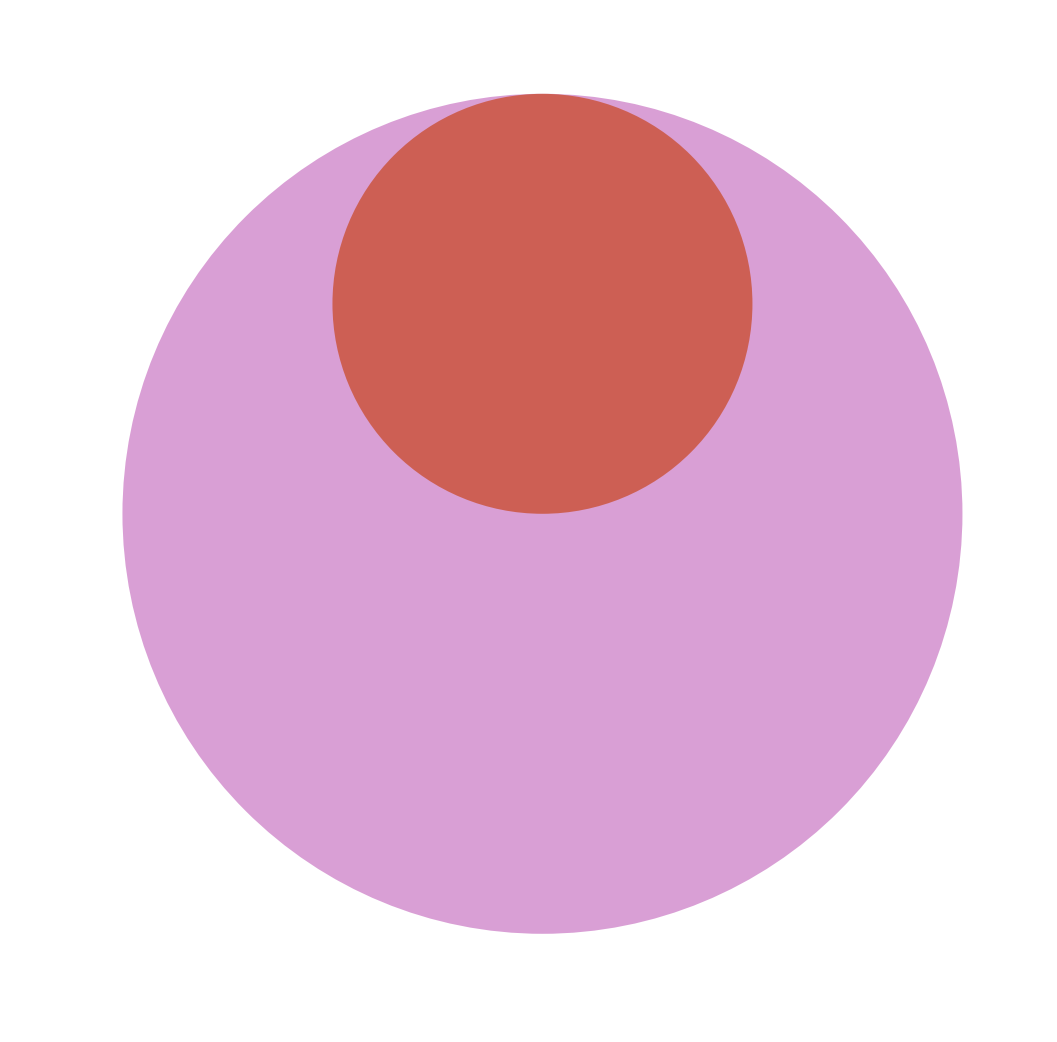

In [9]:
circles = np.array([[0,0,1,0.4,0.4], [0,0.5,0.5,0.6,0.6]])
fig = draw_circles(circles, cmap='gnuplot', adjust_border=0.1)

# Example of using random parameters

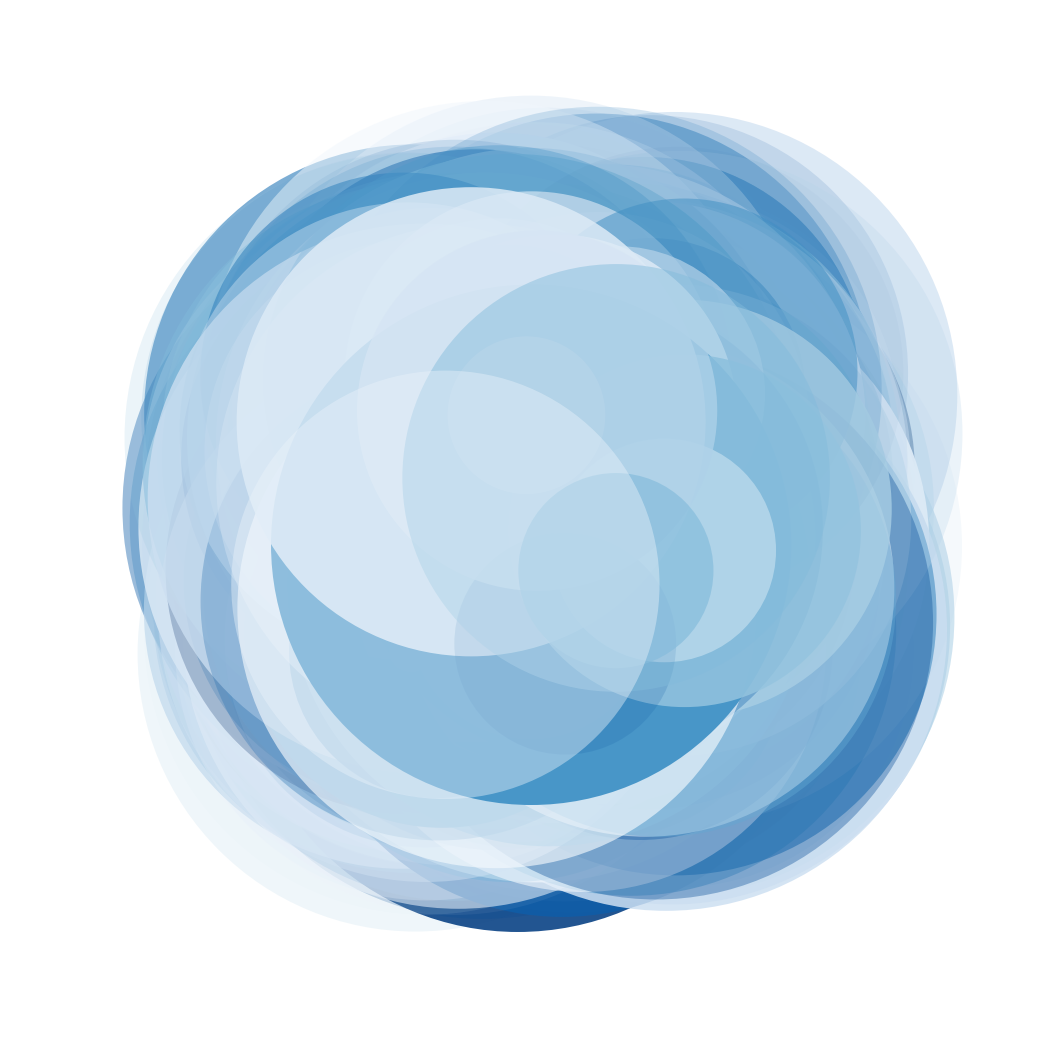

In [10]:
n = 1000
circles = np.random.rand(n, 5)
fig = draw_circles(circles, cmap='Blues', adjust_border=0.1)

# Example of using adjusted random parameters

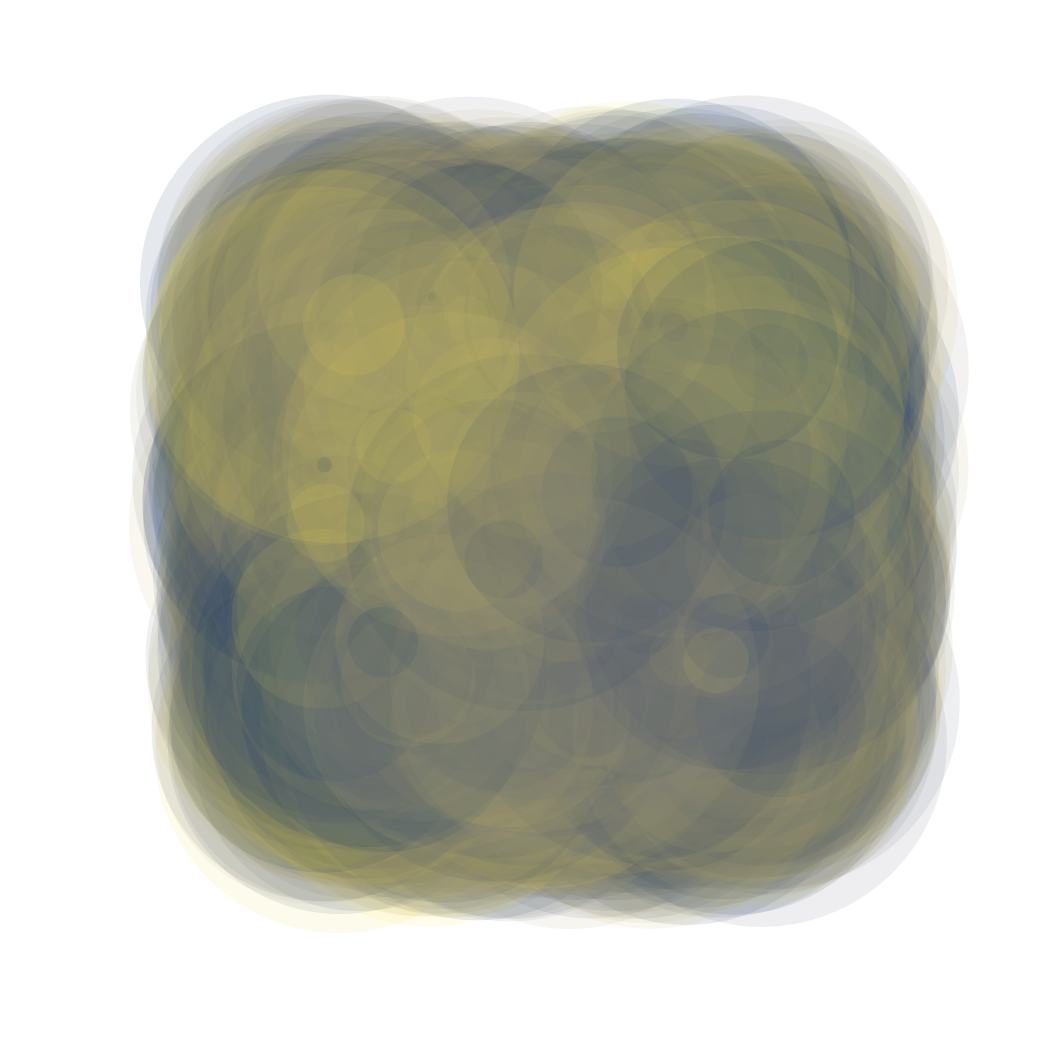

In [112]:
n = 5000

circles = np.random.rand(n, 5)
circles[:, 2] *= 0.4
circles[:, 3] = 0.1

fig = draw_circles(circles, cmap='cividis', adjust_border=0.1)

# Random search over adjustment paramters and colormaps

In [12]:
%%capture
# using capture to display everything in a nicely formatted way.

n = 1000
circles = np.random.rand(n, 5)

# get all available colormaps
cmaps = plt.colormaps()

figs_count = 20
figs = []
xs = np.random.rand(figs_count, 6)

for x in xs:
    cmap = cmaps[int(x[5] * len(cmaps))]
    figs.append(draw_circles(circles * x[:5], cmap=cmap, adjust_border=0.1))

Color map: gray_r
Multipliers:
	x * 0.76874570273396
	y * 0.42522488108633305
	radius * 0.8759665683614368
	alpha * 0.10135581996309895
	color * 0.6405463688529357
feature_vector: [0.7687457  0.42522488 0.87596657 0.10135582 0.64054637 0.7357435 ]


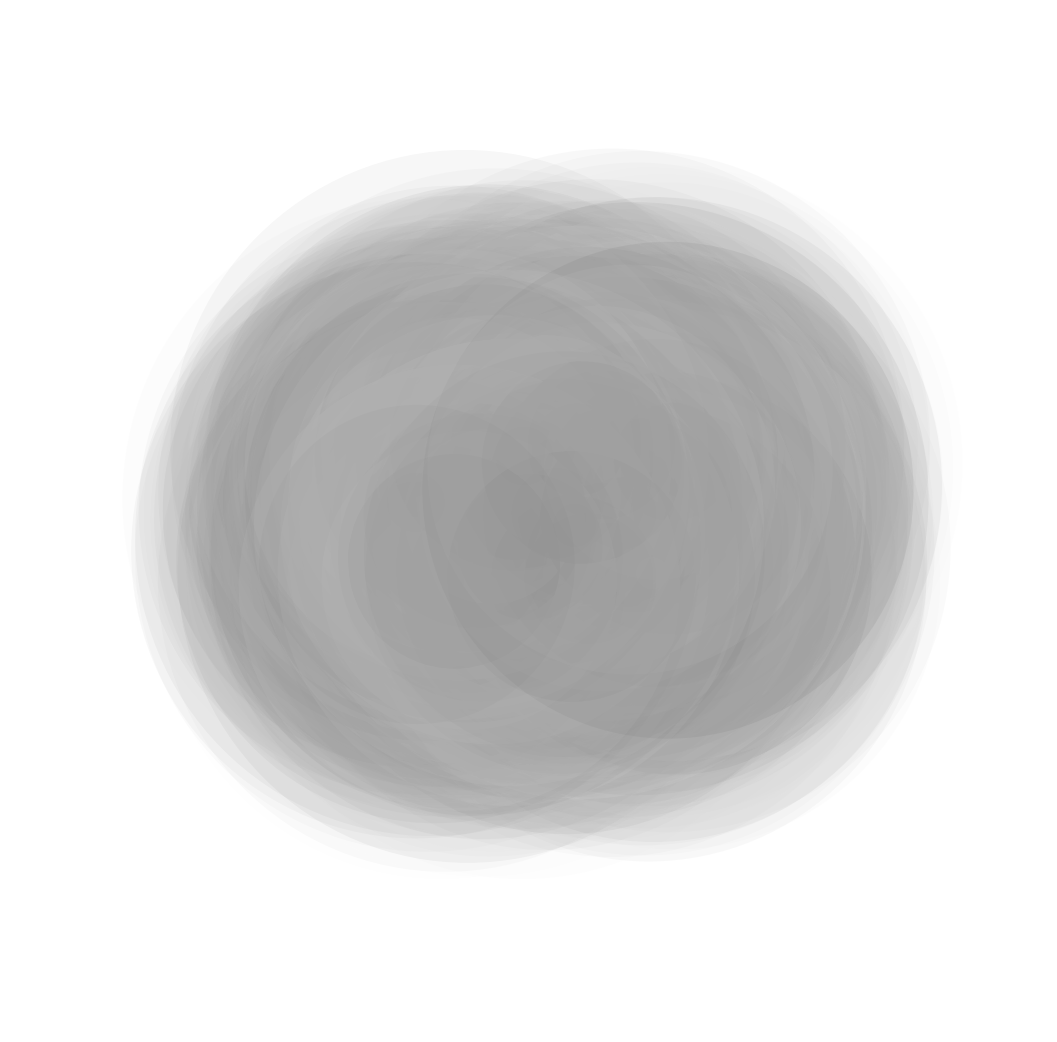

Color map: BrBG
Multipliers:
	x * 0.8461964657774846
	y * 0.4370226018150538
	radius * 0.9133839822607928
	alpha * 0.29962213277707295
	color * 0.2133431884377417
feature_vector: [0.84619647 0.4370226  0.91338398 0.29962213 0.21334319 0.02502184]


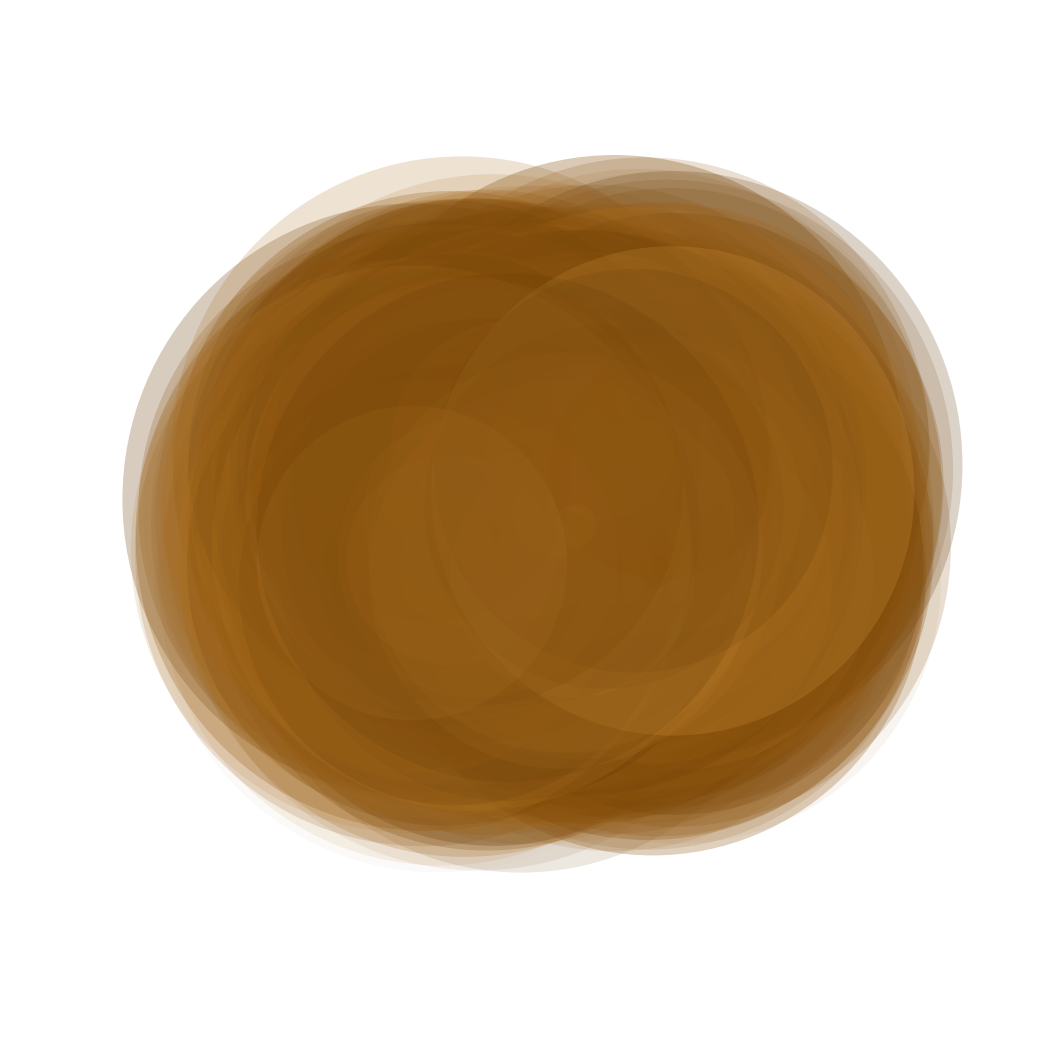

Color map: hot_r
Multipliers:
	x * 0.07458298669126029
	y * 0.3505526717700834
	radius * 0.48465647464076334
	alpha * 0.9729339952757396
	color * 0.6605904805624346
feature_vector: [0.07458299 0.35055267 0.48465647 0.972934   0.66059048 0.74740517]


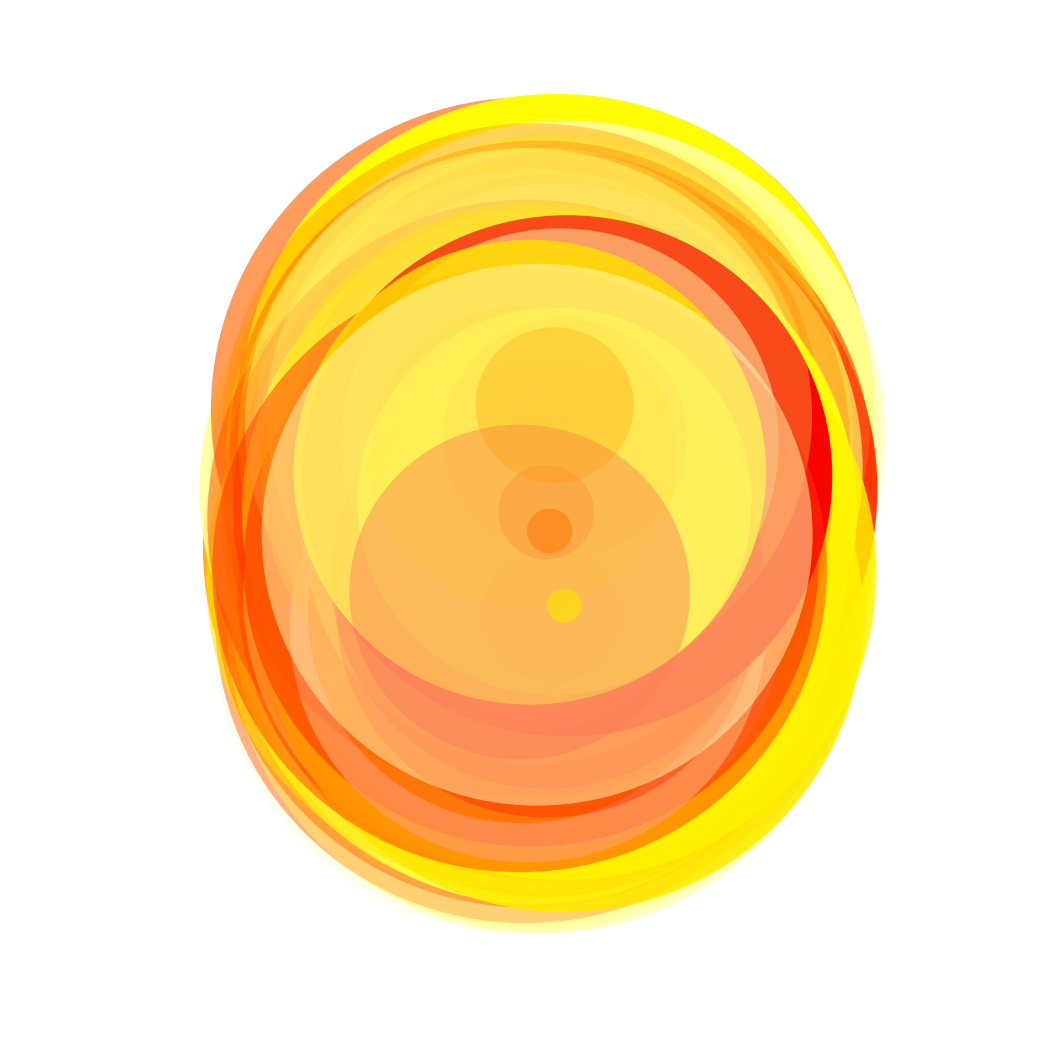

Color map: Accent
Multipliers:
	x * 0.2470246876969323
	y * 0.505629765296644
	radius * 0.6352281976155041
	alpha * 0.9496852813854451
	color * 0.24992416582463917
feature_vector: [0.24702469 0.50562977 0.6352282  0.94968528 0.24992417 0.00181782]


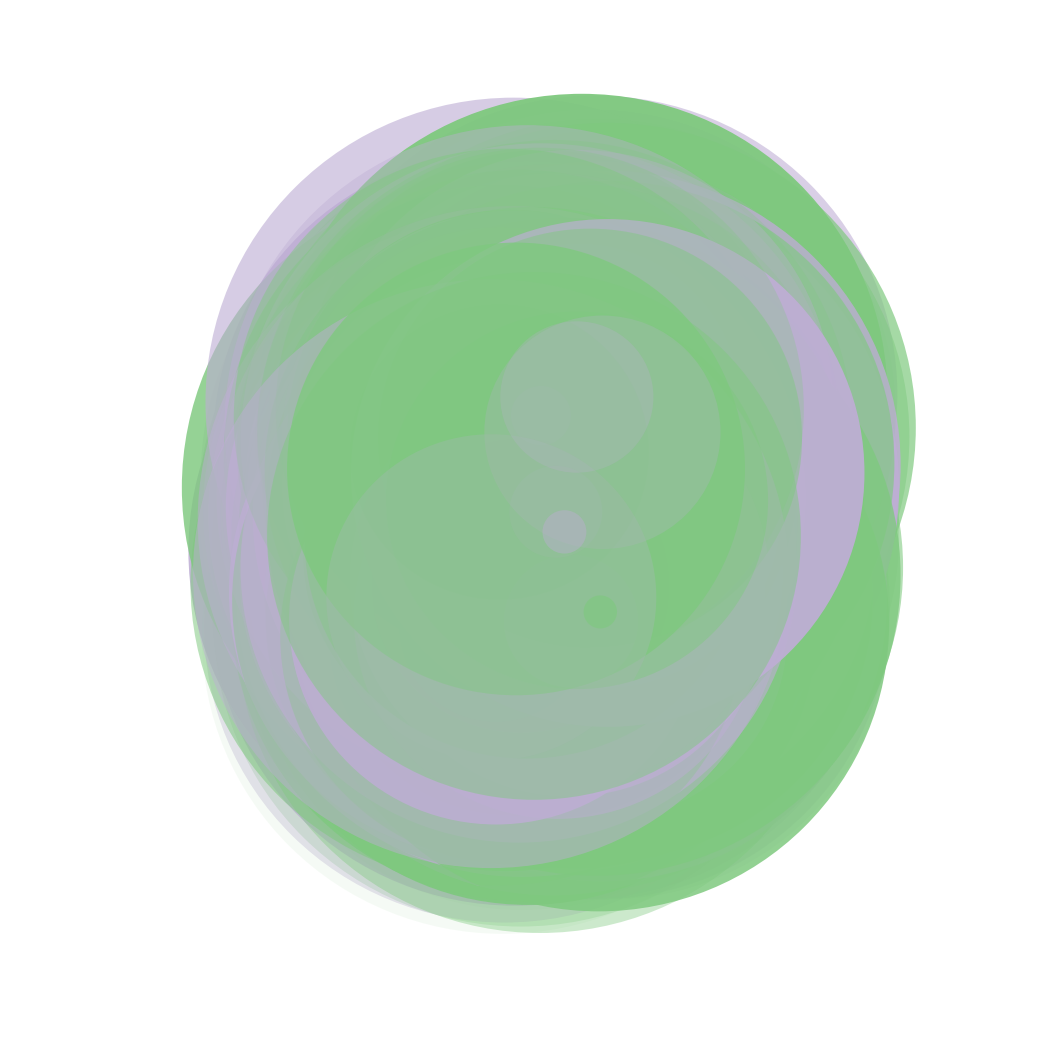

Color map: RdYlGn
Multipliers:
	x * 0.9180371699201028
	y * 0.054618724606218305
	radius * 0.5577000470733906
	alpha * 0.5084852962026236
	color * 0.42981214787542743
feature_vector: [0.91803717 0.05461872 0.55770005 0.5084853  0.42981215 0.32884662]


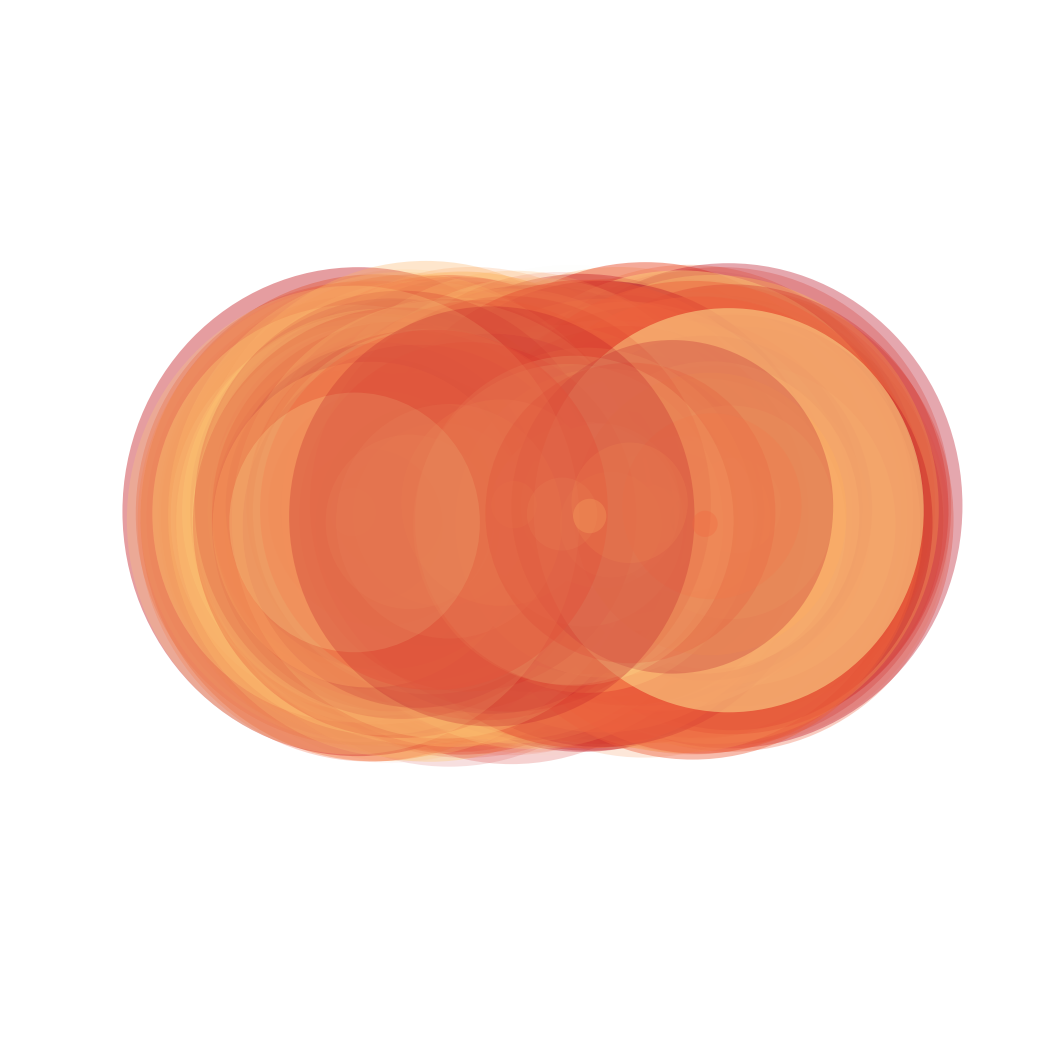

Color map: gist_gray_r
Multipliers:
	x * 0.6587251217486781
	y * 0.09216634840536075
	radius * 0.8665902657471972
	alpha * 0.3802555988506757
	color * 0.44645179129674784
feature_vector: [0.65872512 0.09216635 0.86659027 0.3802556  0.44645179 0.63279293]


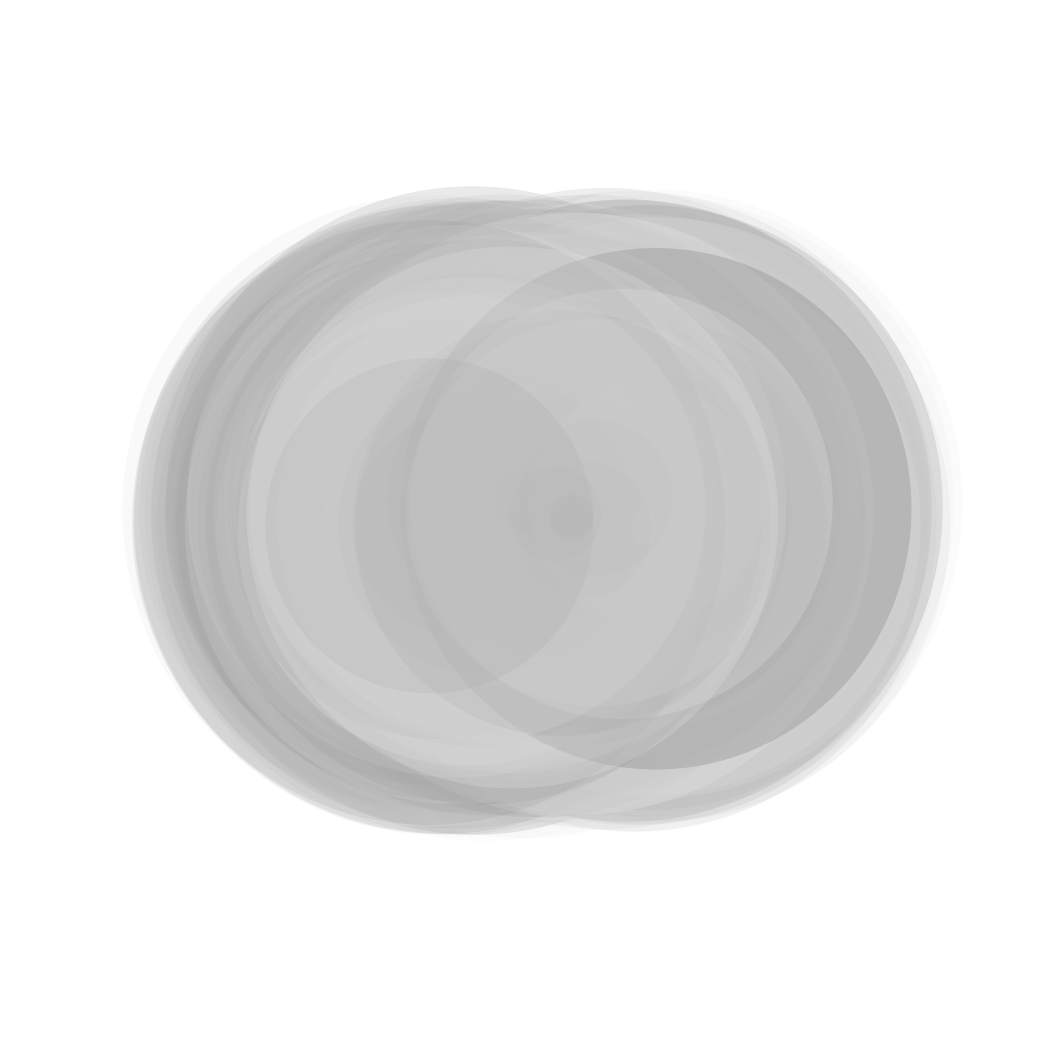

Color map: Greys
Multipliers:
	x * 0.5266158606538284
	y * 0.9745608558404836
	radius * 0.9369696106918382
	alpha * 0.3182821881473846
	color * 0.9003461320278128
feature_vector: [0.52661586 0.97456086 0.93696961 0.31828219 0.90034613 0.11429444]


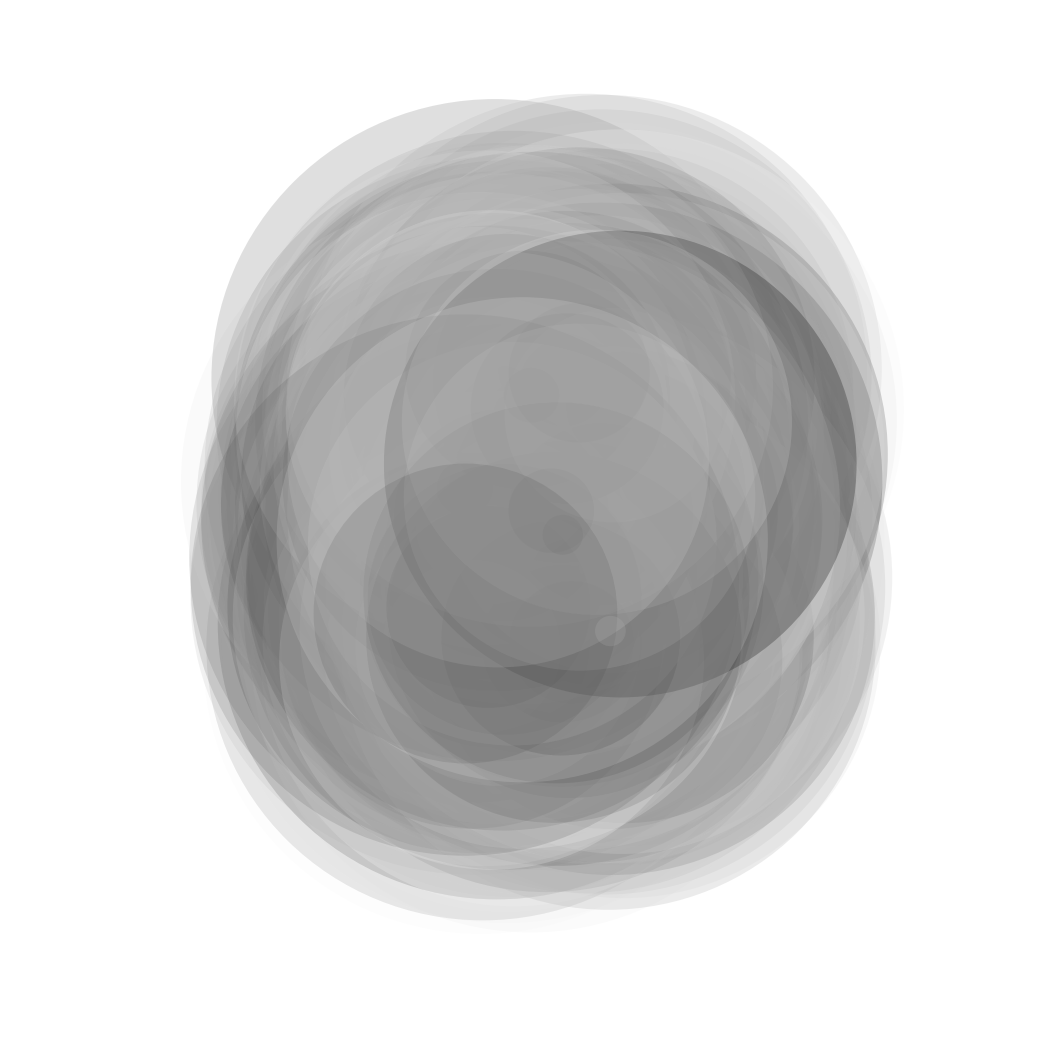

Color map: afmhot
Multipliers:
	x * 0.5899631400420847
	y * 0.24086570747320768
	radius * 0.24766584515390822
	alpha * 0.8770505027120507
	color * 0.04385123559886073
feature_vector: [0.58996314 0.24086571 0.24766585 0.8770505  0.04385124 0.46300933]


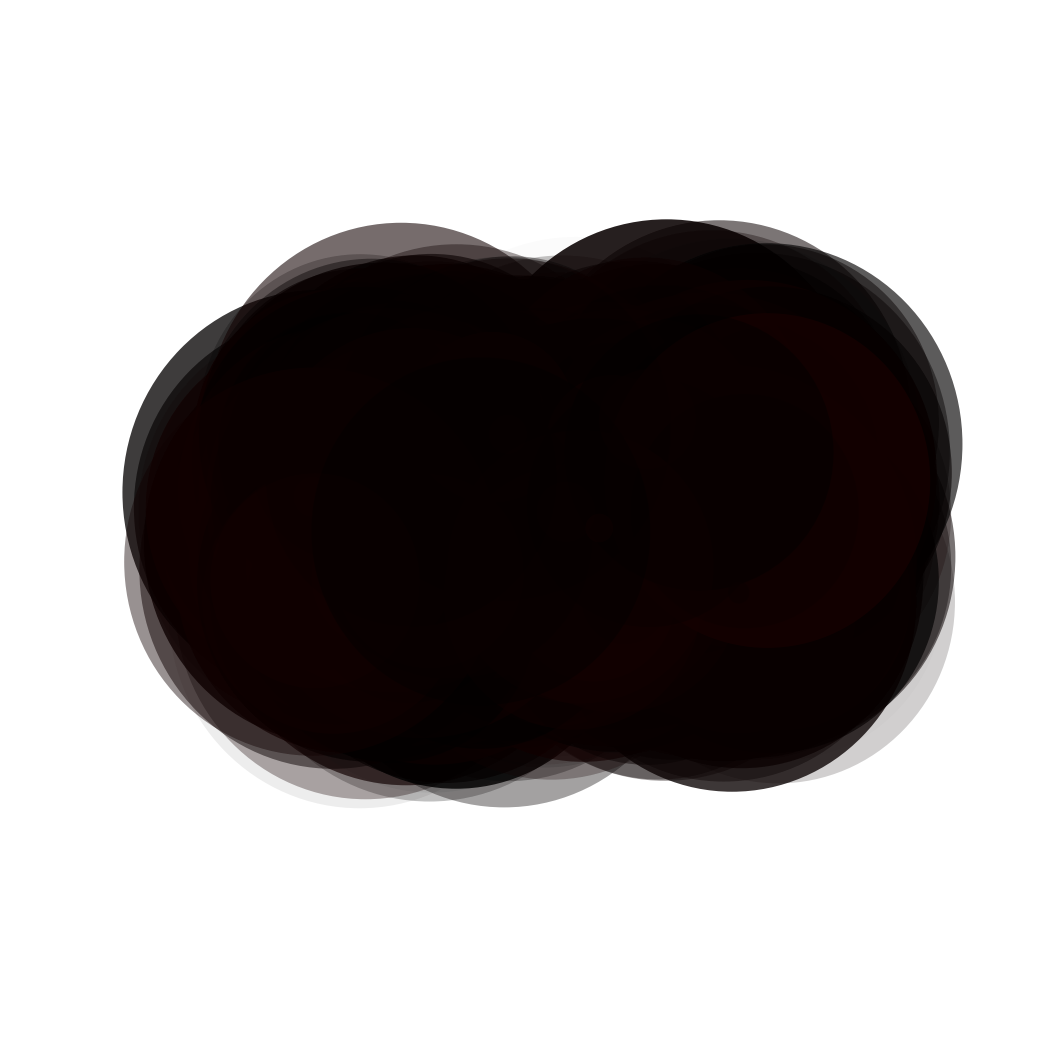

Color map: cool_r
Multipliers:
	x * 0.826015084355443
	y * 0.47609999267138947
	radius * 0.3830416940977449
	alpha * 0.05356280327790264
	color * 0.94110298110425
feature_vector: [0.82601508 0.47609999 0.38304169 0.0535628  0.94110298 0.55689562]


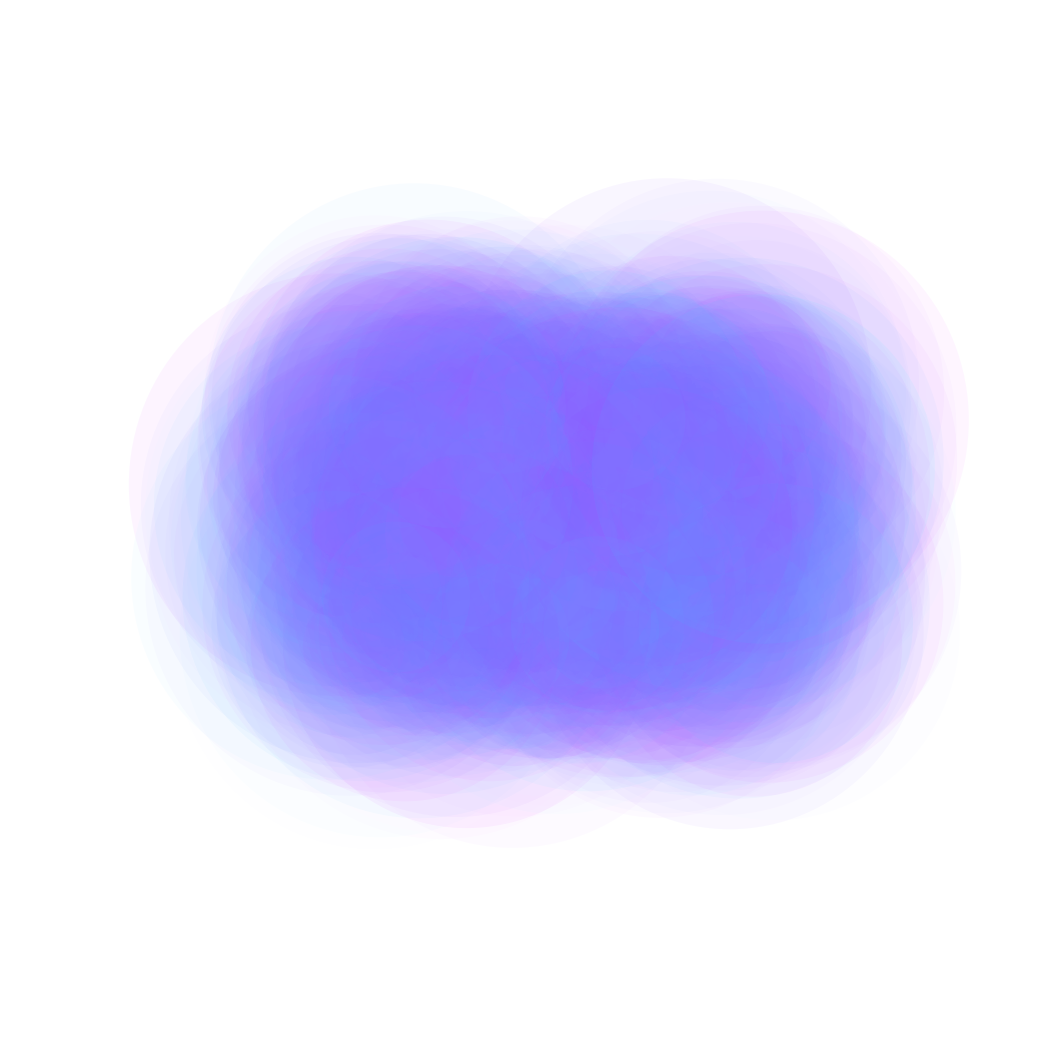

Color map: PuRd_r
Multipliers:
	x * 0.9536675452560605
	y * 0.6615236614456669
	radius * 0.42323060892862674
	alpha * 0.5960847935699242
	color * 0.5582604756211496
feature_vector: [0.95366755 0.66152366 0.42323061 0.59608479 0.55826048 0.26006948]


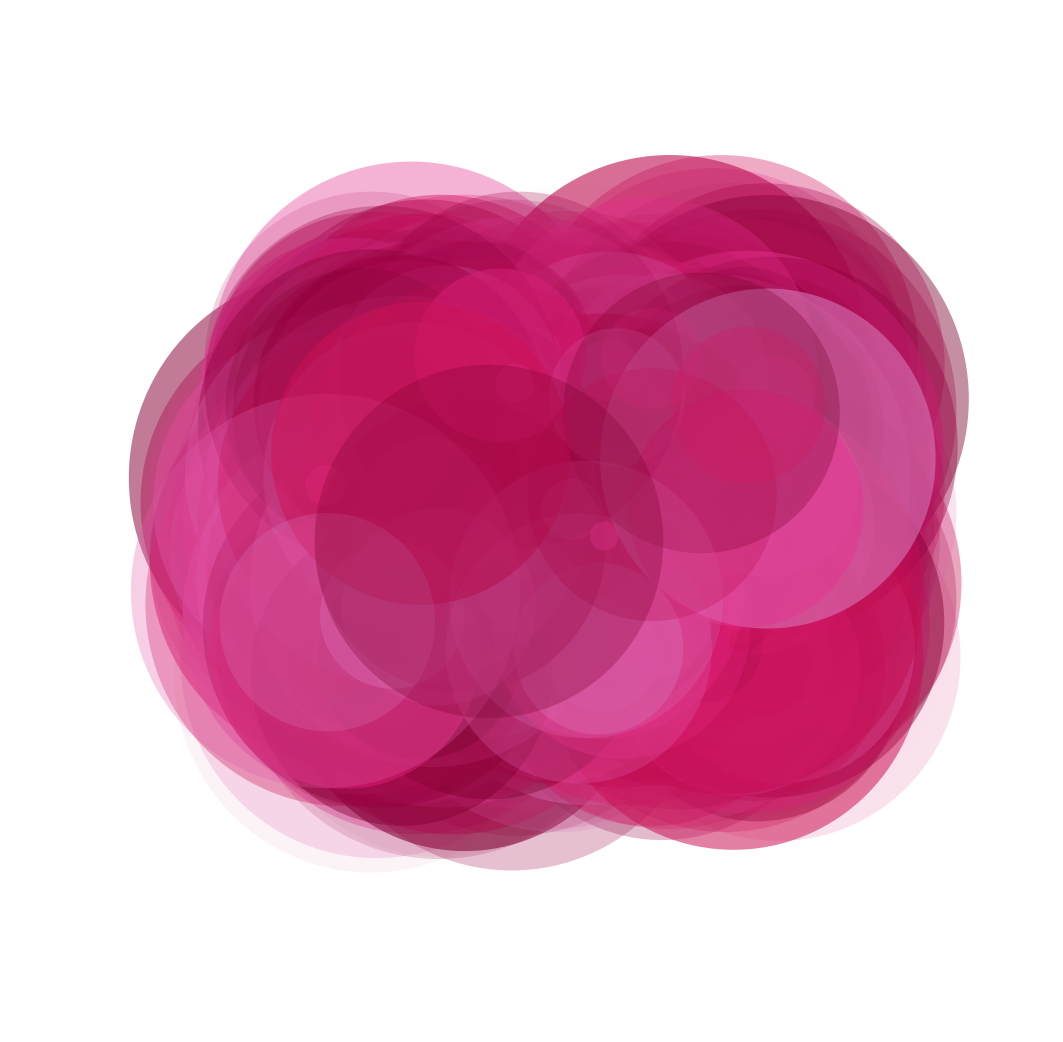

Color map: Spectral_r
Multipliers:
	x * 0.05432861616646689
	y * 0.10075780928395206
	radius * 0.6284814090072919
	alpha * 0.8892795365874304
	color * 0.7888121267793203
feature_vector: [0.05432862 0.10075781 0.62848141 0.88927954 0.78881213 0.39905979]


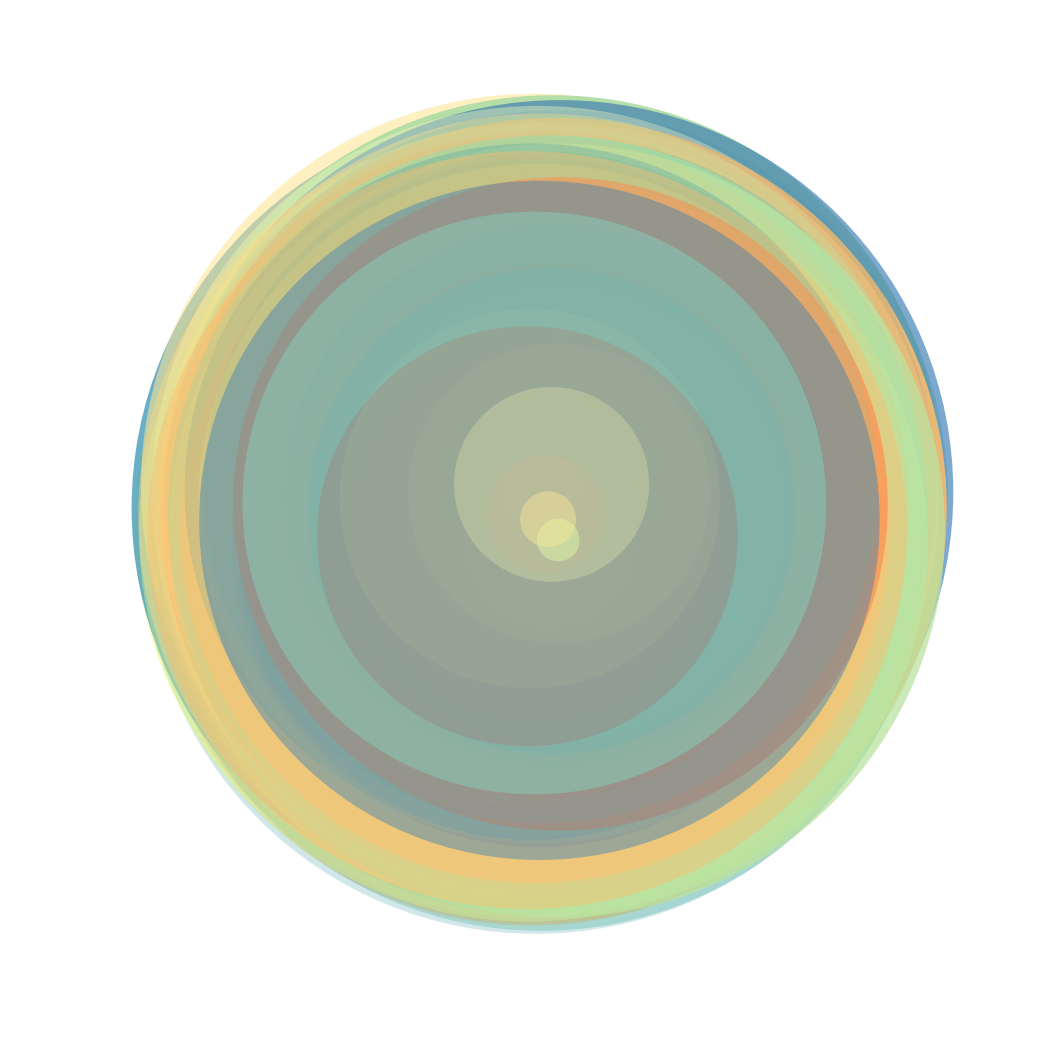

Color map: PuBuGn_r
Multipliers:
	x * 0.7864910733367554
	y * 0.3100692693857553
	radius * 0.9895916869341915
	alpha * 0.606173277373583
	color * 0.6744841677522626
feature_vector: [0.78649107 0.31006927 0.98959169 0.60617328 0.67448417 0.22842521]


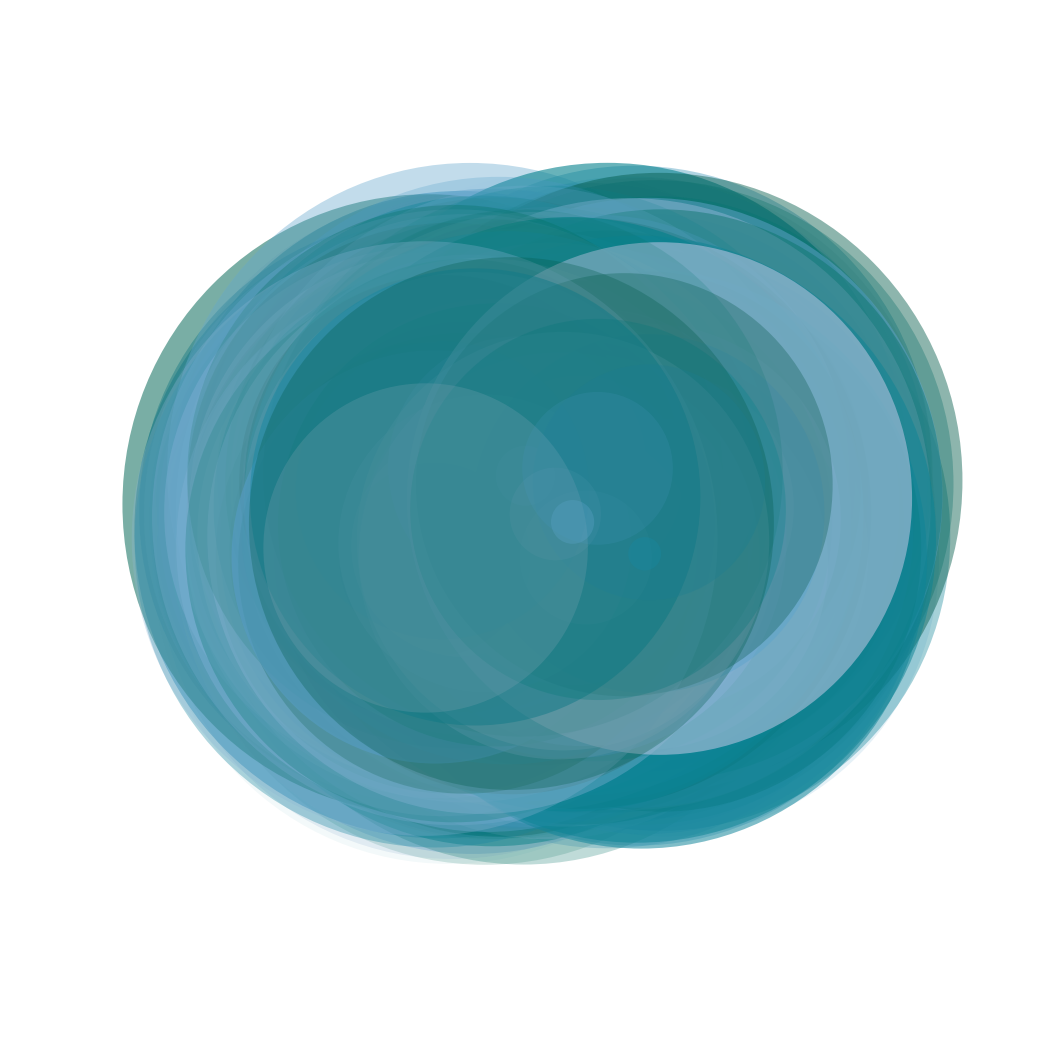

Color map: gist_heat_r
Multipliers:
	x * 0.20276023064344018
	y * 0.2027632760090715
	radius * 0.9866458738340192
	alpha * 0.3566495379885203
	color * 0.37676878520503465
feature_vector: [0.20276023 0.20276328 0.98664587 0.35664954 0.37676879 0.64401984]


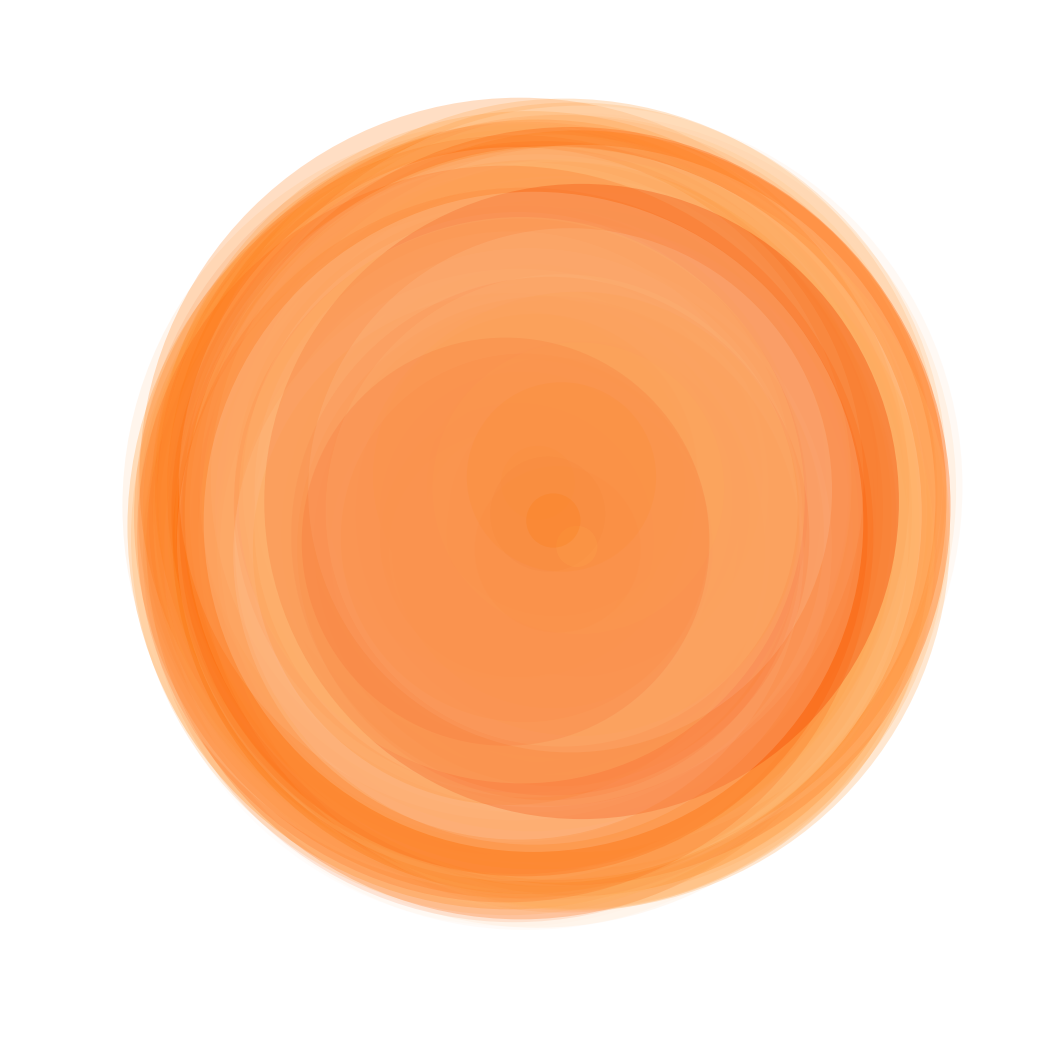

Color map: terrain
Multipliers:
	x * 0.9239438710909332
	y * 0.24592997132528005
	radius * 0.6355050885045377
	alpha * 0.9336941488304648
	color * 0.9908291196160928
feature_vector: [0.92394387 0.24592997 0.63550509 0.93369415 0.99082912 0.96395571]


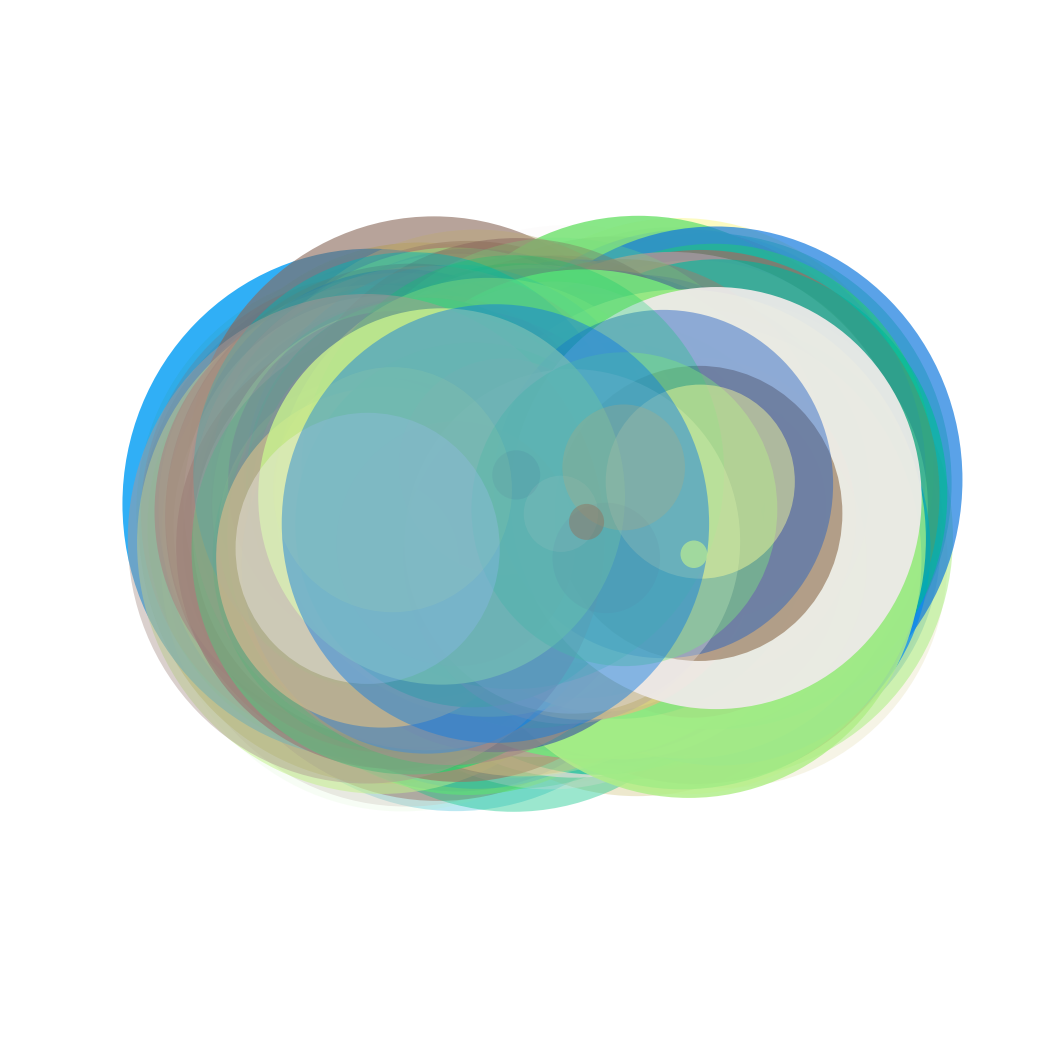

Color map: gnuplot2_r
Multipliers:
	x * 0.16948804378854276
	y * 0.7533847992391729
	radius * 0.7609776694326494
	alpha * 0.5024486712890109
	color * 0.17911476497388912
feature_vector: [0.16948804 0.7533848  0.76097767 0.50244867 0.17911476 0.7153018 ]


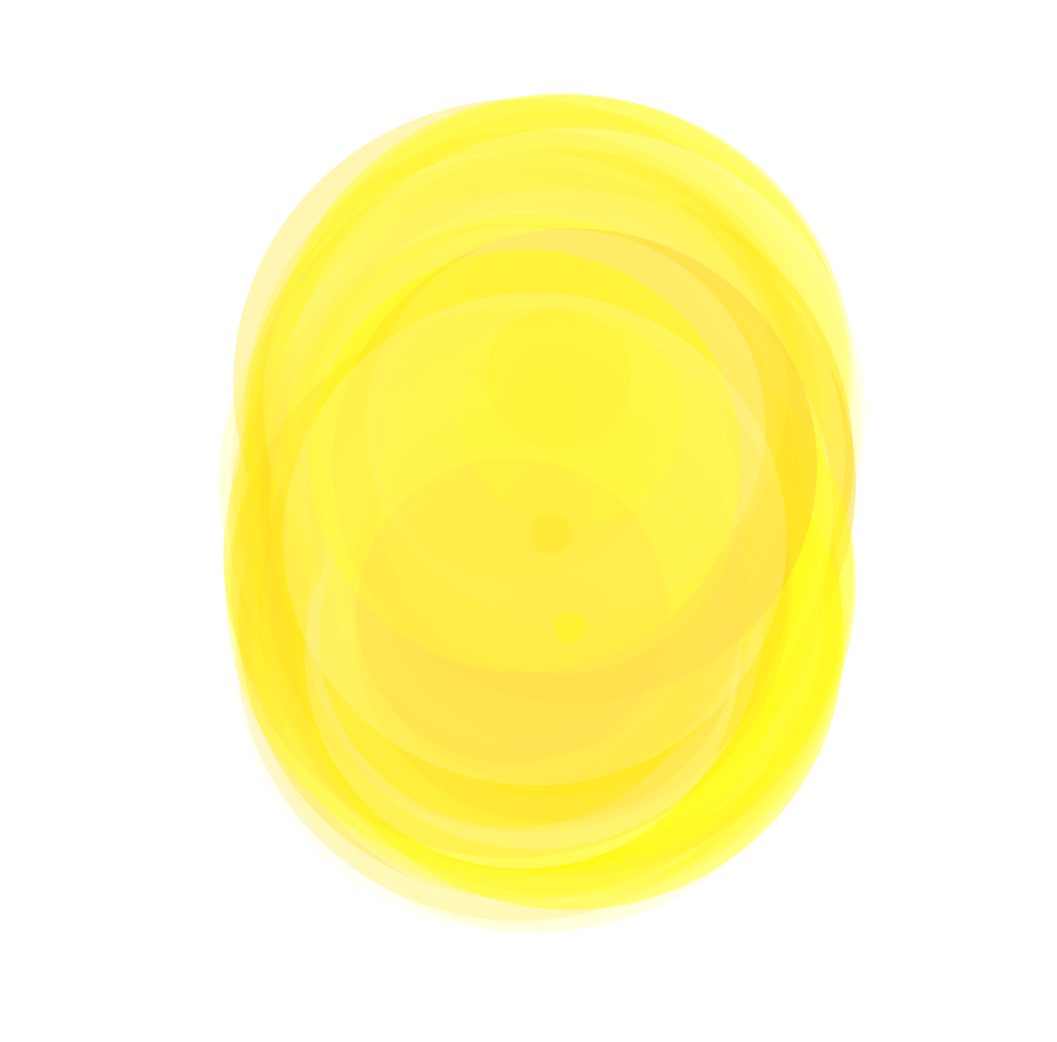

Color map: PuRd
Multipliers:
	x * 0.6285633100008077
	y * 0.4612409235120203
	radius * 0.7695482496853152
	alpha * 0.6340114813701114
	color * 0.6294199579546103
feature_vector: [0.62856331 0.46124092 0.76954825 0.63401148 0.62941996 0.25524228]


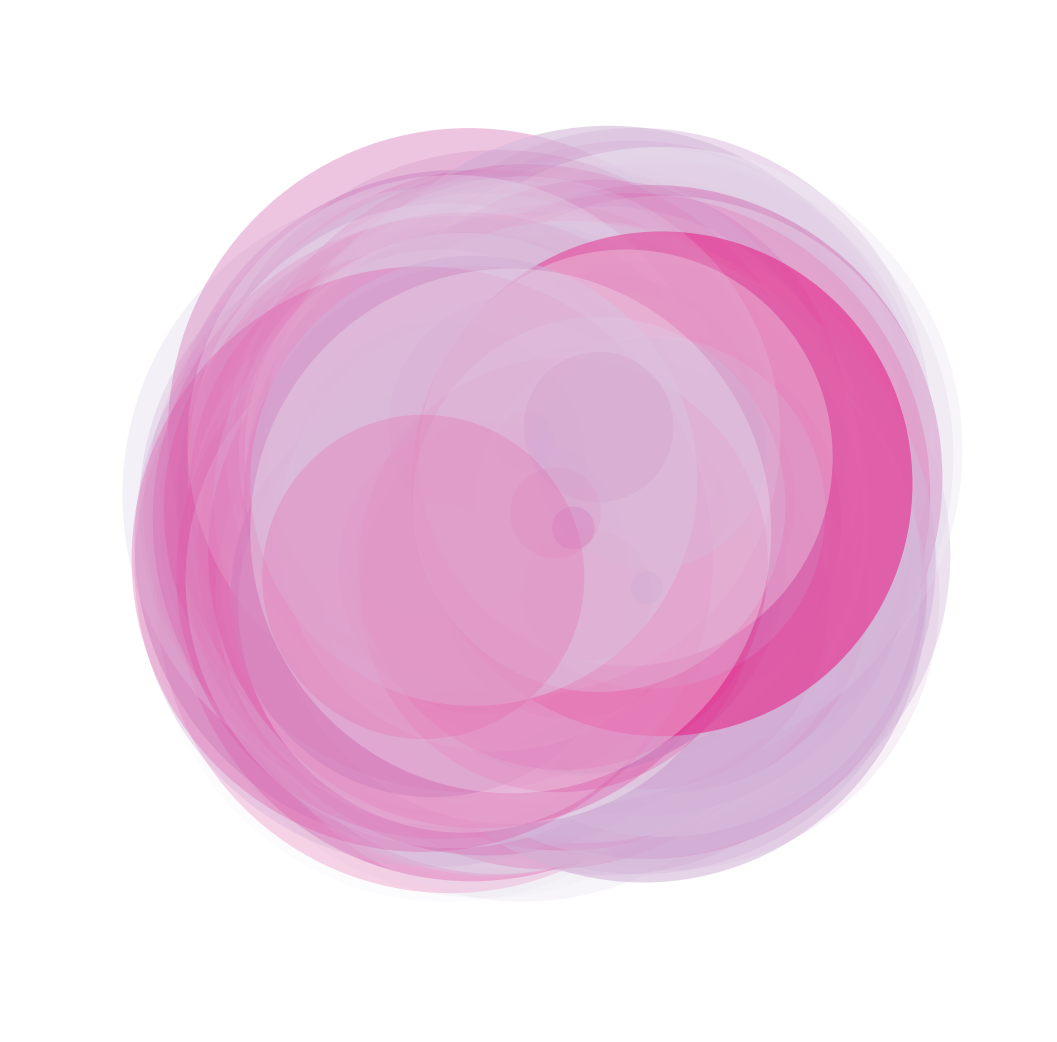

Color map: bwr
Multipliers:
	x * 0.45824439260450045
	y * 0.034584264426813616
	radius * 0.7775916632405339
	alpha * 0.6700299203505552
	color * 0.3951916049551427
feature_vector: [0.45824439 0.03458426 0.77759166 0.67002992 0.3951916  0.5297743 ]


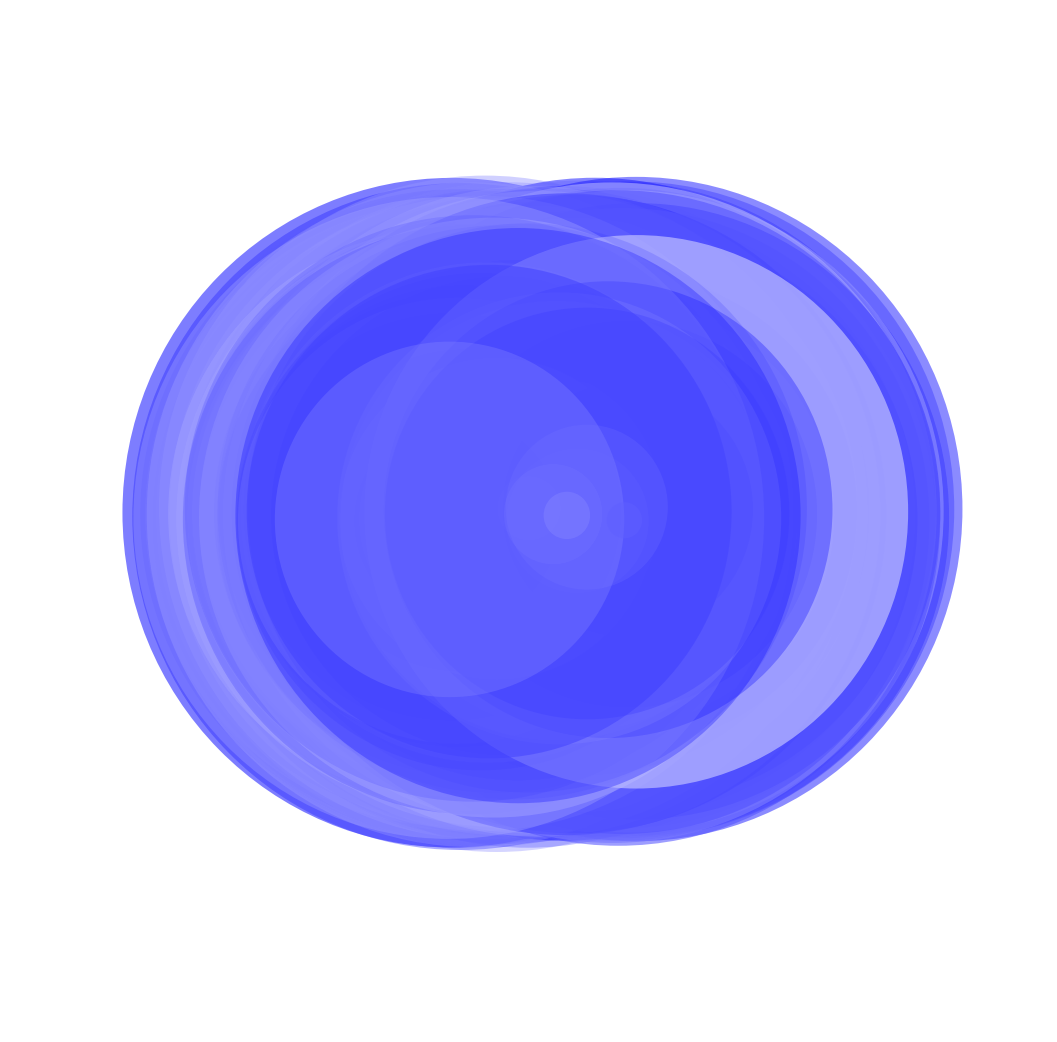

Color map: YlOrRd
Multipliers:
	x * 0.04785709315609654
	y * 0.2738440844260934
	radius * 0.06425320780638077
	alpha * 0.5001405488885643
	color * 0.7420843993421072
feature_vector: [0.04785709 0.27384408 0.06425321 0.50014055 0.7420844  0.45480305]


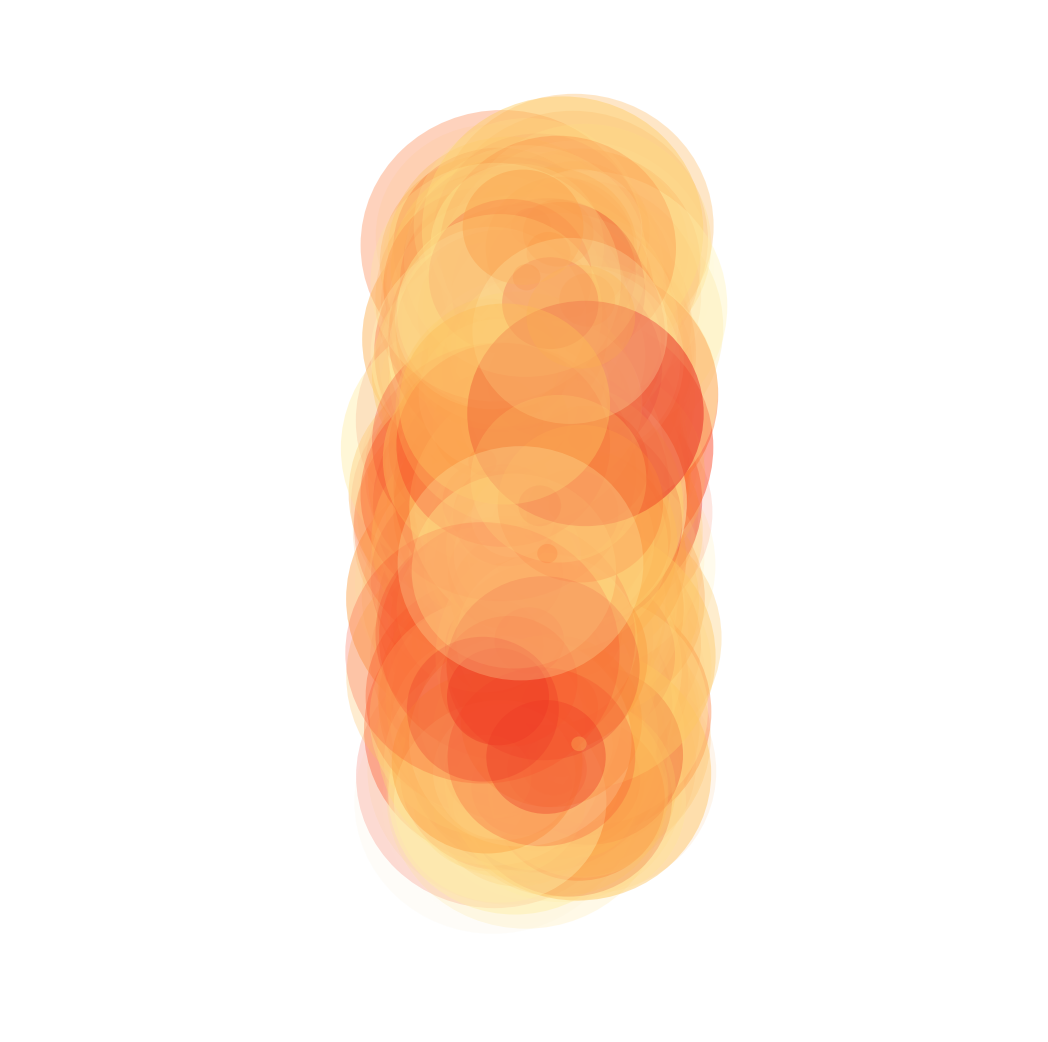

Color map: hot
Multipliers:
	x * 0.7808119857749
	y * 0.9743980627672642
	radius * 0.9825562344590709
	alpha * 0.2504139207644548
	color * 0.19863223260158802
feature_vector: [0.78081199 0.97439806 0.98255623 0.25041392 0.19863223 0.7404503 ]


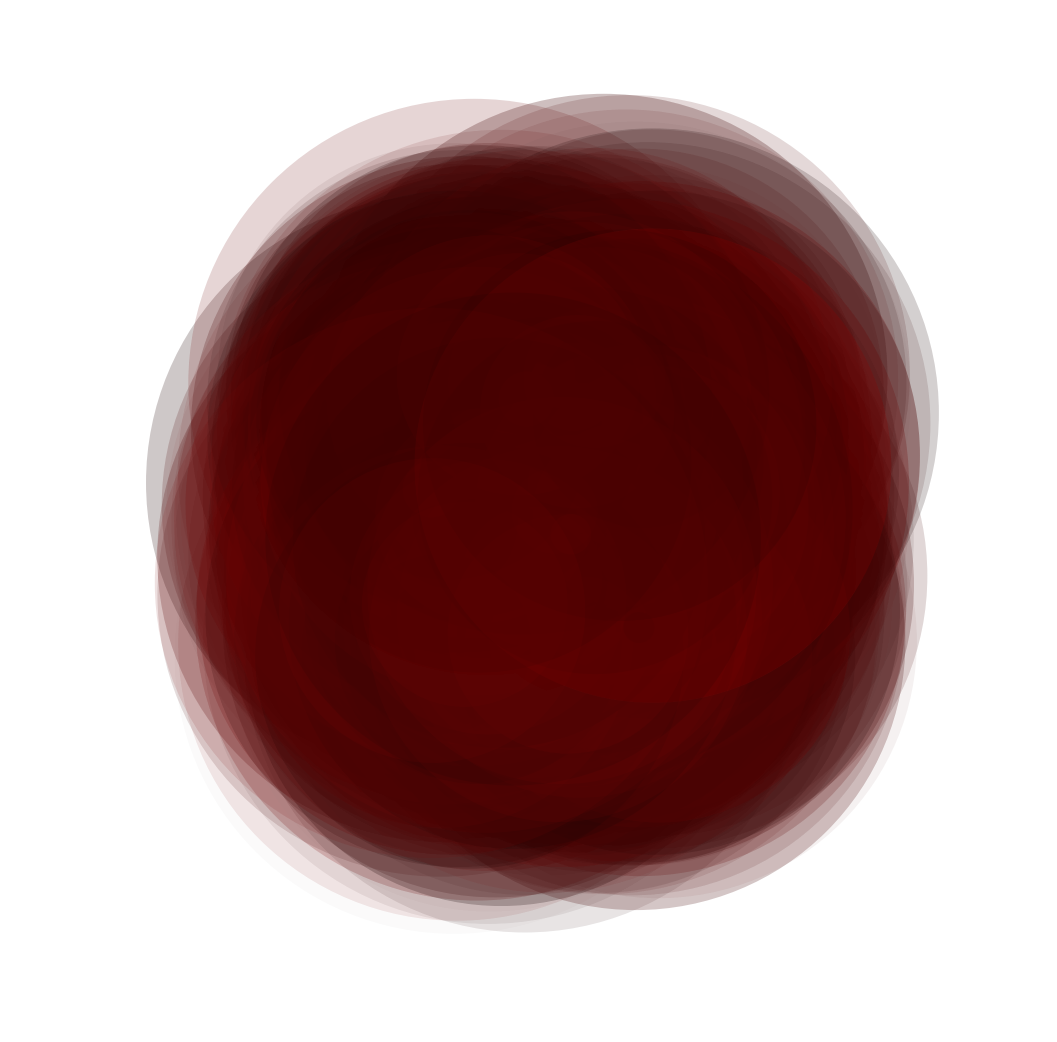

Color map: gnuplot_r
Multipliers:
	x * 0.9592361588151832
	y * 0.017681010894411653
	radius * 0.8492379181266295
	alpha * 0.36338942143914343
	color * 0.3977600283694961
feature_vector: [0.95923616 0.01768101 0.84923792 0.36338942 0.39776003 0.72041275]


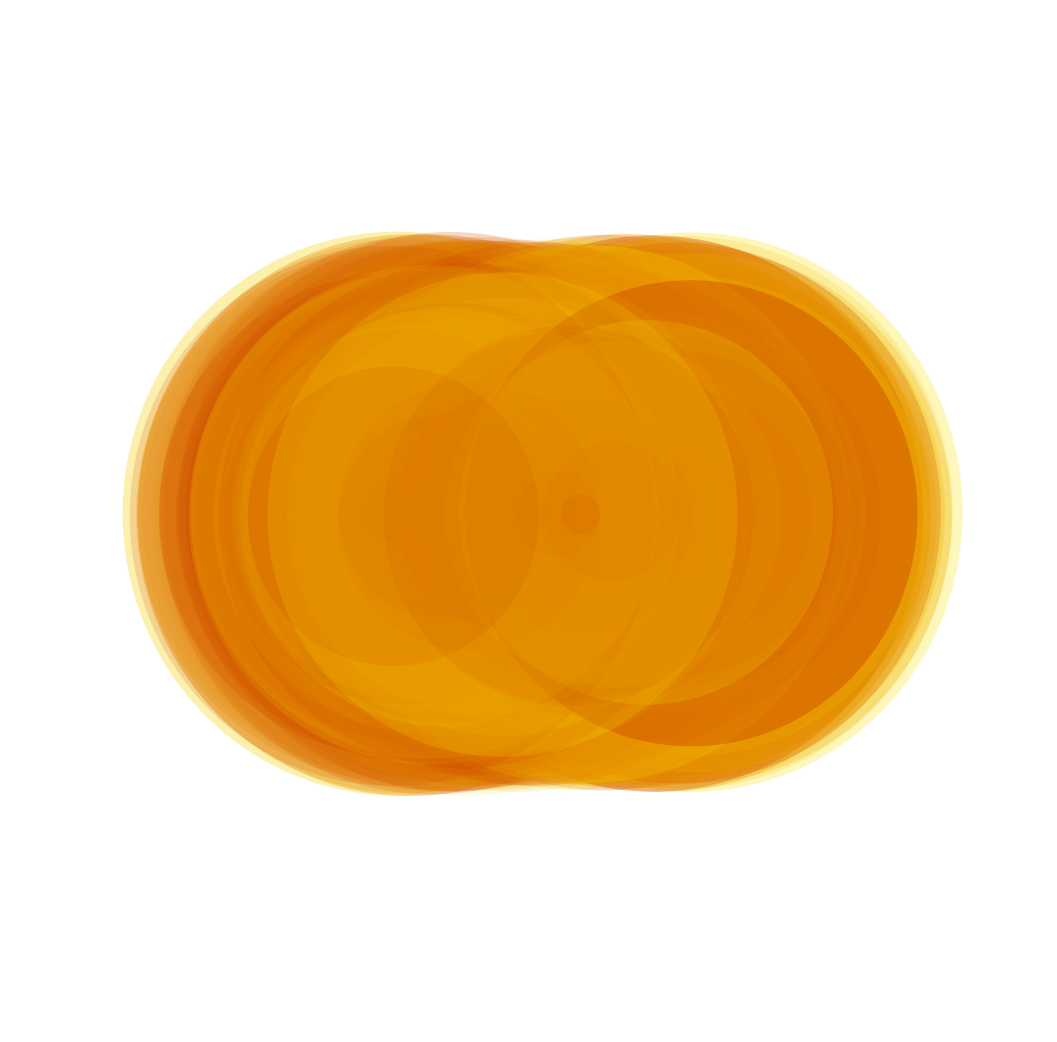

In [13]:
# displaying the results of the random search
from IPython.display import display

for x, figure in zip(xs, figs):
    print('Color map: {}'.format(cmaps[int(x[5] * len(cmaps))]))
    print('Multipliers:\n\tx * {}\n\ty * {}\n\tradius * {}\n\talpha * {}\n\tcolor * {}'.format(*x[:5]))
    print('feature_vector: {}'.format(x))
    display(figure)

In [15]:
# If you like something you see, you can easily save it:
figs[9].savefig('rosy.jpg')